In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [178]:
df.head(5)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


Changing the columns names for your convenient:-

In [181]:
df = df.rename(columns={"Production (Tons)":"Production(Tons)","Production per Person (Kg)":"Production_per_Person(Kg)","Acreage (Hectare)":"Acreage(Hectare)","Yield (Kg / Hectare)":"Yield(Kg/Hectare)"})

In [183]:
df.head(4)

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"


## Data Cleaning

In [186]:
df['Production(Tons)'] = df['Production(Tons)'].str.replace(".","")
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].str.replace(".","")
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].str.replace(",","")
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].str.replace(".","")
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].str.replace(".","")
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].str.replace(",","")




In [188]:
df.head(4)

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422


Remove the unnessary column

In [191]:
df = df.drop("Unnamed: 0",axis=1)

In [193]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,751675
1,India,Asia,348448000,260721,4950000,703935
2,China,Asia,123059739,88287,1675215,734591
3,Thailand,Asia,87468496,1264303,1336575,654422
4,Pakistan,Asia,65450704,324219,1130820,57879


In [195]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [197]:
df[df['Acreage(Hectare)'].isnull()]

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


Removing the null values:---

In [200]:
df = df.dropna().reset_index()

In [202]:
df.tail(5)

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
97,97,Spain,Europe,394,8,9,435965
98,98,Lebanon,Asia,97,16,3,283864
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,119498
101,102,Syria,Asia,1,0,0,830342


In [204]:
df.isna().sum()

index                        0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [206]:
df.dtypes

index                         int64
Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

Convert the data types:-

In [209]:
df["Production(Tons)"] = df["Production(Tons)"].astype(int)
df["Production_per_Person(Kg)"] = df["Production_per_Person(Kg)"].astype(int)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(int)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(int)

In [211]:
df.dtypes

index                         int64
Country                      object
Continent                    object
Production(Tons)              int32
Production_per_Person(Kg)     int32
Acreage(Hectare)              int32
Yield(Kg/Hectare)             int32
dtype: object

# Univariate Analysis

 ## Q1) How many countries produce sugarcane from each continent?

In [215]:
df.head()

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [217]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

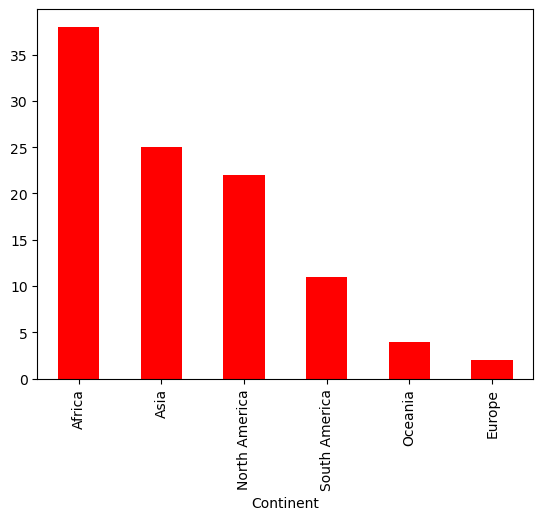

In [219]:
df['Continent'].value_counts().plot(kind = 'bar',color = 'red')

In [220]:
df.describe()

,index,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,102.000000,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,50.529412,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,29.638985,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,25.250000,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,50.500000,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,75.750000,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,102.000000,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


Checking the outliers:-

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\tejan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


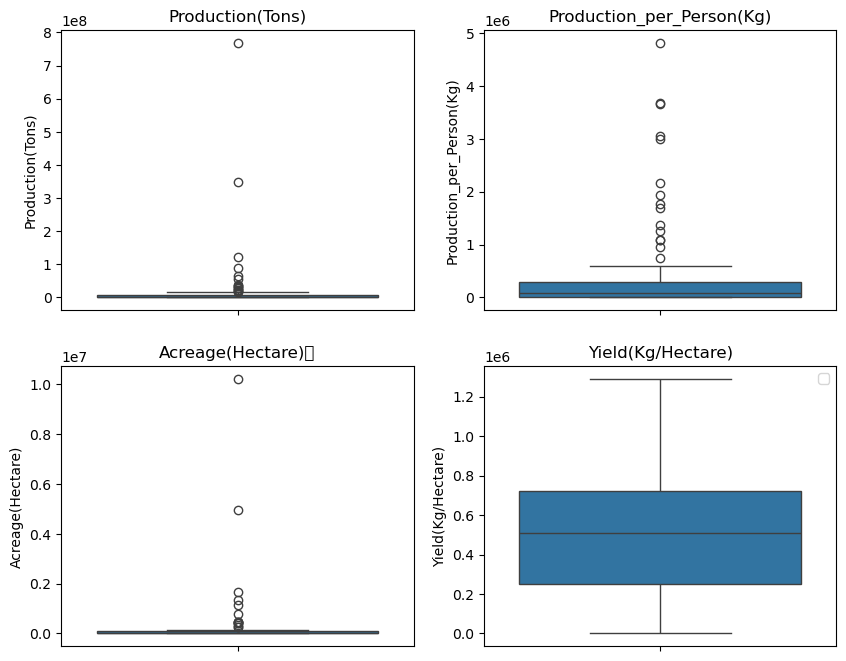

In [224]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.title('Production_per_Person(Kg)')
plt.subplot(2,2,3)
sns.boxplot(df['Acreage(Hectare)'])
plt.title('Acreage(Hectare)	')
plt.subplot(2,2,4)
sns.boxplot(df['Yield(Kg/Hectare)'])
plt.title('Yield(Kg/Hectare)')
plt.legend()
plt.show()

### checking the distrubtion of the data

C:\Users\tejan\AppData\Local\Temp\ipykernel_6120\2459509076.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\tejan\AppData\Local\Temp\ipykernel_6120\2459509076.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person(Kg)'])
C:\Users\tejan\

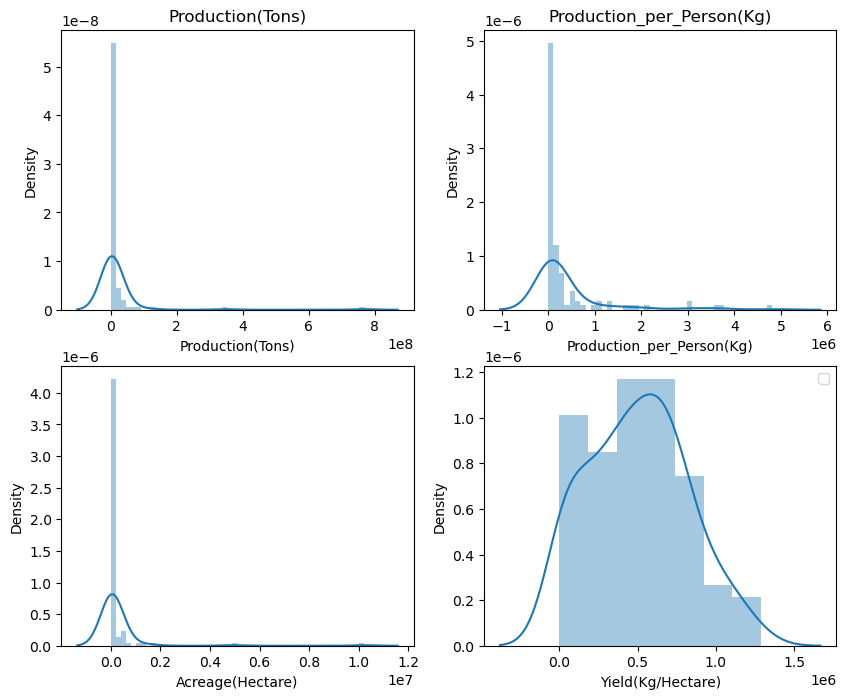

In [227]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(df['Production(Tons)'])
plt.title('Production(Tons)')
plt.subplot(2,2,2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.title('Production_per_Person(Kg)')
plt.subplot(2,2,3)
sns.distplot(df['Acreage(Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield(Kg/Hectare)'])
plt.legend()
plt.show()

## Bivariate Analysis

In [229]:
df.head()

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879


## Which country produces maximum sugarcane?

In [241]:
df_new = df[['Country','Production(Tons)']].set_index("Country")
df_new

,Production(Tons)
Country,
Brazil,768678382
India,348448000
China,123059739
Thailand,87468496
Pakistan,65450704
...,...
Spain,394
Lebanon,97
Singapore,50


<Axes: xlabel='Country', ylabel='Production(Tons)'>

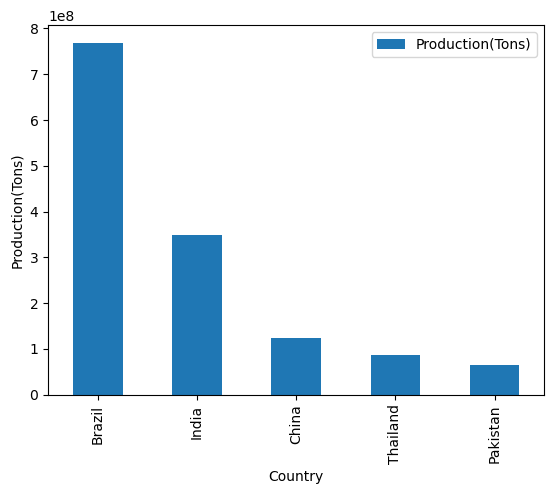

In [159]:
df_new.head().plot(kind = 'bar' ,xlabel='Country',ylabel = 'Production(Tons)')

In [253]:
df_new['Percentage_tons'] = (df_new['Production(Tons)']/df_new['Production(Tons)'].sum())*100

In [255]:
df_new

,Production(Tons),Percentage_tons
Country,,
Brazil,768678382,4.072729e+01
India,348448000,1.846200e+01
China,123059739,6.520138e+00
Thailand,87468496,4.634389e+00
Pakistan,65450704,3.467809e+00
...,...,...
Spain,394,2.087551e-05
Lebanon,97,5.139401e-06
Singapore,50,2.649176e-06


<Axes: ylabel='Percentage_tons'>

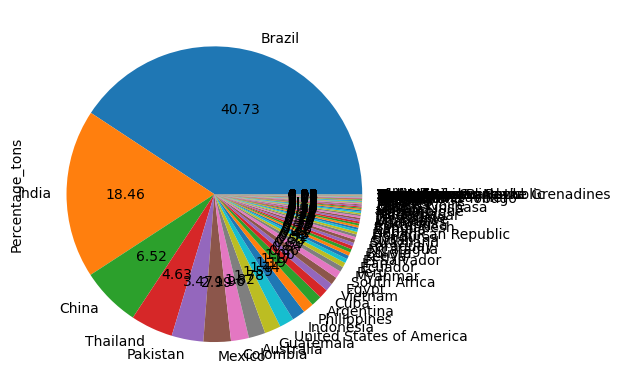

In [259]:
df_new['Percentage_tons'].plot(kind = 'pie' , autopct = '%.2f')

<Axes: xlabel='Country'>

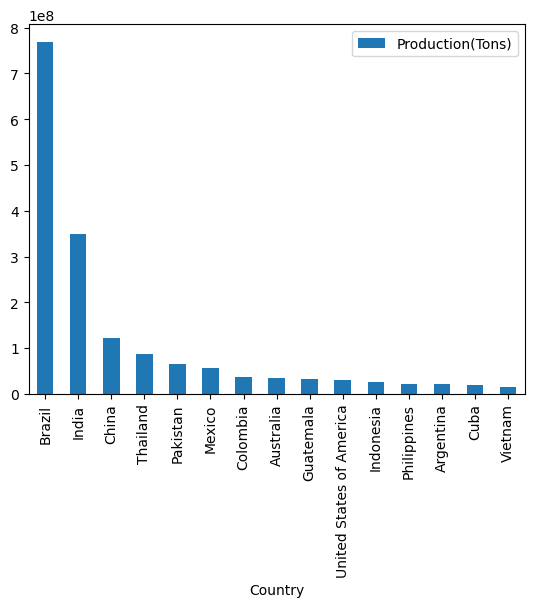

In [261]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)", ascending = False).head(15).plot(kind = "bar")


C:\Users\tejan\AppData\Local\Temp\ipykernel_6120\2673024606.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


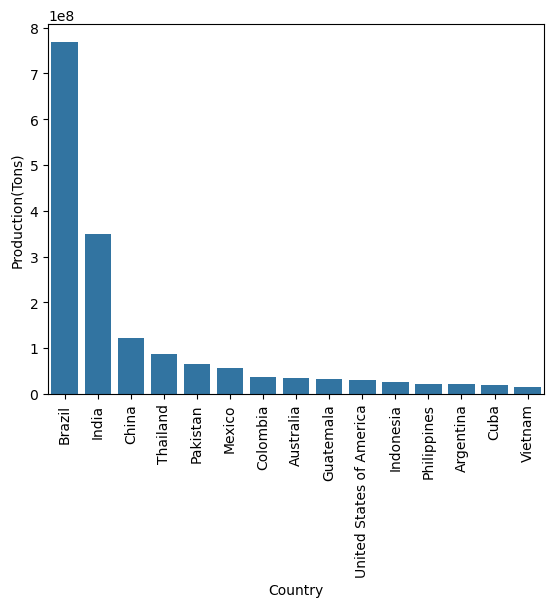

In [269]:
ax = sns.barplot(data = df.head(15), x = 'Country', y = 'Production(Tons)')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()


# Which country has highest land?

In [272]:
df

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,435965
98,98,Lebanon,Asia,97,16,3,283864
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,119498


In [292]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)


<Axes: xlabel='Country'>

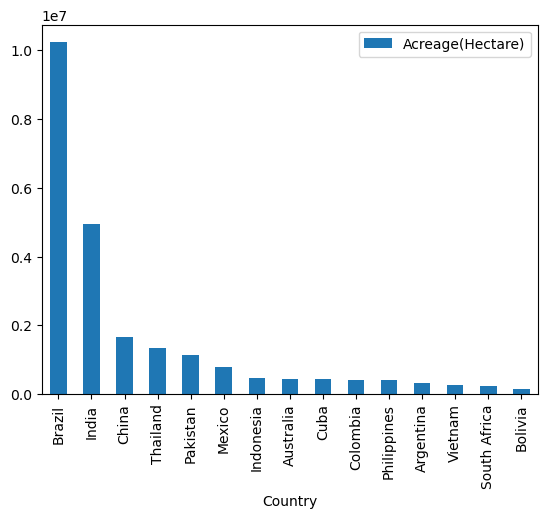

In [298]:
df_acr.plot(kind = 'bar' ,x='Country', y ='Acreage(Hectare)')

## Which country has highest yield per hectare?

In [301]:
df

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,435965
98,98,Lebanon,Asia,97,16,3,283864
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,119498


In [305]:
df_yield = df.sort_values('Yield(Kg/Hectare)',ascending = False)


<Axes: xlabel='Country'>

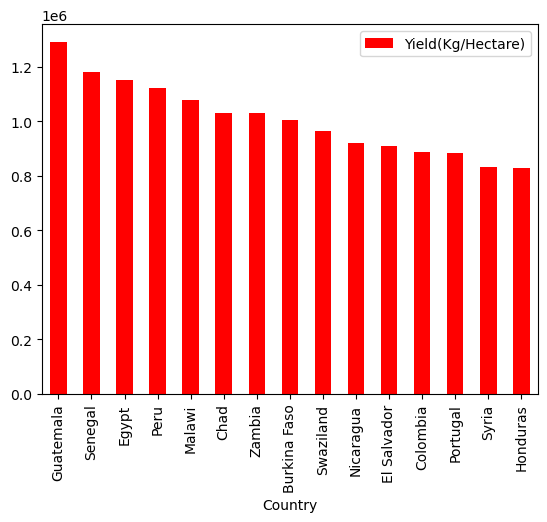

In [319]:
df_yield.head(15).plot(kind = 'bar' , x = 'Country' , y = 'Yield(Kg/Hectare)' , color = 'red')

# Do countries with highest land produce more sugarcane?

In [324]:
df

,index,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,751675
1,1,India,Asia,348448000,260721,4950000,703935
2,2,China,Asia,123059739,88287,1675215,734591
3,3,Thailand,Asia,87468496,1264303,1336575,654422
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,435965
98,98,Lebanon,Asia,97,16,3,283864
99,100,Singapore,Asia,50,9,2,25
100,101,Samoa,Oceania,12,6,1,119498


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

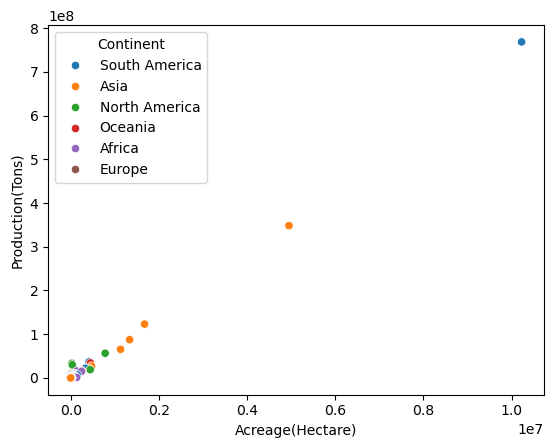

In [364]:
sns.scatterplot(data = df , x ='Acreage(Hectare)' ,  y ='Production(Tons)' , hue='Continent' )

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

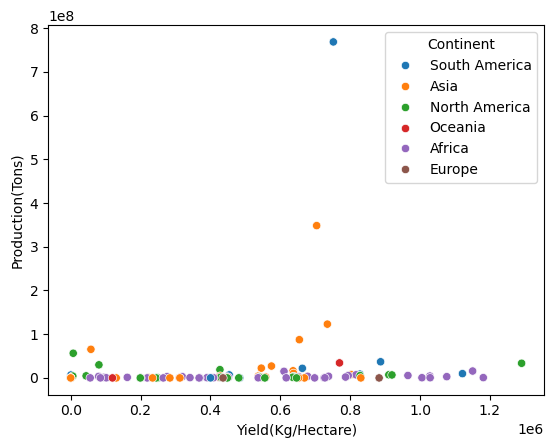

In [356]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)", hue = "Continent")

# Analysis for Continent

df

In [370]:
df_continent = df.groupby("Continent").sum()

In [374]:
df_continent['number_of_countries'] = df.groupby('Continent').count()['Country']

In [377]:
df_continent

,index,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,,
Africa,2061,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472,10144110,1439089,20700454,38
Asia,1253,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425,3120808,10608319,11197308,25
Europe,189,PortugalSpain,5823,536,71,1318709,2
North America,1101,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947,15420953,1581983,9581162,22
Oceania,227,AustraliaFijiPapua New GuineaSamoa,36177574,3158066,490909,1624191,4
South America,323,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126,10228540,11369236,6766896,11


## Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

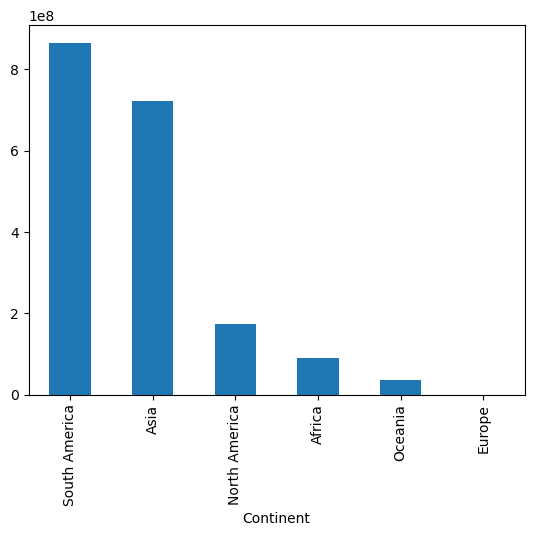

In [392]:
df_continent['Production(Tons)'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='number_of_countries', ylabel='Production(Tons)'>

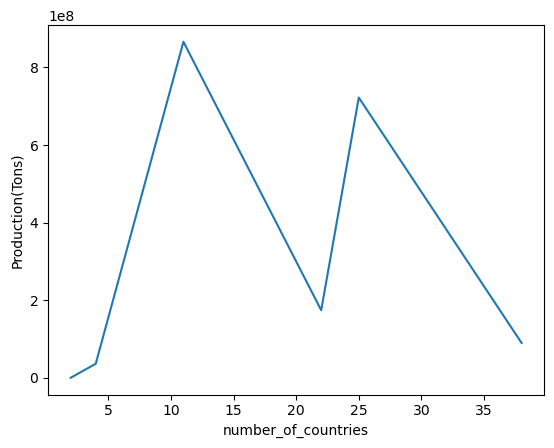

In [400]:
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )